# Environment Setup:
Before using this library, please ensure that you have the necessary packages and their corresponding versions.

Please refer to the [README.md](https://github.com/liuzy0708/Online-Learning-Framework?tab=readme-ov-file#environment-setup) for details.


In [1]:
from io import StringIO
from contextlib import redirect_stderr

with redirect_stderr(StringIO()):
    from tqdm.auto import tqdm
from Tools.OL import *
from Tools.ONE_STEP import *
from Tools.TWO_STEP_CHUNK import *
from Tools.TWO_STEP_INSTANCE import *

# Visualization:
Do you need visual results?

If needed, the results will be saved in a PDF document in the Results folder.

In [2]:
show_plot = input("Do you want to visualize the results? (Y/N): ").strip().lower() or "y"
need_matrix = 'n'
if show_plot == 'y':
    need_matrix = input("Do you want to generate the confusion matrix? (Y/N): ").strip().lower() or "y"

# Settings:
Please enter your experiment parameters in the cell below.

Press Enter to use the default values.

## There are four types of framework choices:
1. OL: Online learning, processing data one sample at a time.
2. ONE-STEP: Uses the classifiers in the OAL_classifier folder to complete model training and online learning in a single phase.
3. TWO-STEP-CHUNK: Uses the classifiers in the classifier folder to complete model training and online learning in two phases, while also supporting batch processing.
4. TWO-STEP-INSTANCE: Uses the classifiers in the classifier folder to complete model training and online learning in two steps, supporting only processing data one sample at a time.

Enter one of the four names above to select your framework


In [3]:
framework = input(f"Input the framework (default: 'OL'): ") or "OL"
max_samples = int(input(f"Input the range of tested stream (default: 1000): ") or "1000")
n_round = int(input(f"Input the number of round (default: 3): ")or "3")
n_pt = int(input(f"Input the number of train samples (default: 100): ") or "100")
dataset_name = input(f"Input the dataset name (default: Waveform): ") or "Waveform"
print(f"Your framework is: {framework}")

Your framework is: OL


# Next:
Based on your selection, specify the corresponding model and parameters.

1. If you choose "OL", valid models are:
``` python
['ARF', 'LB', 'OB', 'OBADWIN', 'DWM', 'OOB', 'SRP', 'AdaC2', 'QRBLS', 'BLS', 'OSSBLS', 'ISSBLS', 'SOSELM', 'NB', 'DES', 'DES_5', 'ACDWM', 'OLI2DS']
```

2. If you choose "ONE-STEP", valid models are:
``` python
['ROALE_DI', 'OALE']
```

3. If you choose "TWO-STEP-CHUNK", valid models and strategies are:
``` python
models:
['ARF', 'LB', 'OB', 'OBADWIN', 'DWM', 'OOB', 'SRP', 'AdaC2', 'QRBLS', 'BLS', 'OSSBLS', 'ISSBLS', 'SOSELM', 'NB', 'DES', 'DES_5', 'ACDWM', 'OLI2DS']
```
``` python
strategies:
['DMI_DD']
```

4. If you choose "TWO-STEP-INSTANCE", valid models and strategies are:
``` python
models:
['ARF', 'LB', 'OB', 'OBADWIN', 'DWM', 'OOB', 'SRP', 'AdaC2', 'QRBLS', 'BLS', 'OSSBLS', 'ISSBLS', 'SOSELM', 'NB', 'DES', 'DES_5', 'ACDWM', 'OLI2DS']
```
``` python
strategies:
['DSA_AI', 'Supervised', 'MTSGQS', 'US_fix', 'US_var', 'CogDQS', 'RS', 'DMI_DD']
```






In [4]:
if framework == "OL":
    clf_name_list = input("Enter classifier names separated by commas (e.g., BLS,DES,SRP, default: 'BLS'): ") or "BLS,NB"
    experiment = OL(max_samples=max_samples, n_round=n_round, n_pt=n_pt, dataset_name=dataset_name,
                    clf_name_list=clf_name_list)

elif framework == "ONE-STEP":
    method_name_list = input("Enter classifier names separated by commas (e.g., OALE,ROALE_DI): ")  #Only these two are supported.
    experiment = One_Step(max_samples=max_samples, n_round=n_round, n_pt=n_pt, dataset_name=dataset_name, method_name_list=method_name_list)

elif framework == "TWO-STEP-CHUNK":
    n_ratio_max = float(input(f"Input the number of ratio max: ") or "0.30") #Annotation ratio
    chunk_size = int(input(f"Input the chunk size: ") or "1")
    clf_name_list = input("Enter classifier names separated by commas (e.g., BLS,DES,SRP): ")
    str_name_list = input(f"Enter strategies names separated by commas (e.g., DMI_DD): ") #only support DMI_DD
    experiment = Two_Step_Chunk(max_samples=max_samples, n_round=n_round, n_pt=n_pt,n_ratio_max=n_ratio_max, chunk_size=chunk_size, dataset_name=dataset_name, clf_name_list=clf_name_list, str_name_list=str_name_list)

elif framework == "TWO-STEP-INSTANCE":
    clf_name_list = input("Enter classifier names separated by commas (e.g., BLS,DES,SRP): ")
    str_name_list = input(f"Enter strategies names separated by commas (e.g., RS,US_fix,US_var): ")
    experiment = Two_Step_Instance(max_samples=max_samples, n_round=n_round, n_pt=n_pt,dataset_name=dataset_name, clf_name_list=clf_name_list, str_name_list=str_name_list)

else:
    raise ValueError("Invalid framework")

# Run:
The predicted results will be saved in CSV format in the Result folder.

If you choose visualization, the visualization results will be displayed here and all plotted results will be saved too.

The result includes the GIF form of Accuracy and F1, and the confusion matrix.

method:BLS
round: 1
round: 2
round: 3

Accuracy BLS: 0.785 ± 0.015
macro-F1 BLS: 0.785 ± 0.015
Average Time BLS: 0.8730 s

method:QRBLS
round: 1
round: 2
round: 3

Accuracy QRBLS: 0.784 ± 0.010
macro-F1 QRBLS: 0.784 ± 0.010
Average Time QRBLS: 0.7365 s

method:OSSBLS
round: 1
round: 2
round: 3

Accuracy OSSBLS: 0.774 ± 0.009
macro-F1 OSSBLS: 0.774 ± 0.009
Average Time OSSBLS: 1.2357 s

method:ISSBLS
round: 1
round: 2
round: 3

Accuracy ISSBLS: 0.708 ± 0.030
macro-F1 ISSBLS: 0.707 ± 0.030
Average Time ISSBLS: 1.0419 s

method:DWM
round: 1
round: 2
round: 3

Accuracy DWM: 0.777 ± 0.000
macro-F1 DWM: 0.766 ± 0.000
Average Time DWM: 0.9069 s

method:NB
round: 1
round: 2
round: 3

Accuracy NB: 0.798 ± 0.000
macro-F1 NB: 0.790 ± 0.000
Average Time NB: 0.2262 s

Saving results to: C:\Users\Alpha\PycharmProjects\Online-Learning-Framework\Results\Results_Waveform_OL_100_1_1000
[1/6] Processing BLS...
[2/6] Processing QRBLS...
[3/6] Processing OSSBLS...
[4/6] Processing ISSBLS...
[5/6] Processin

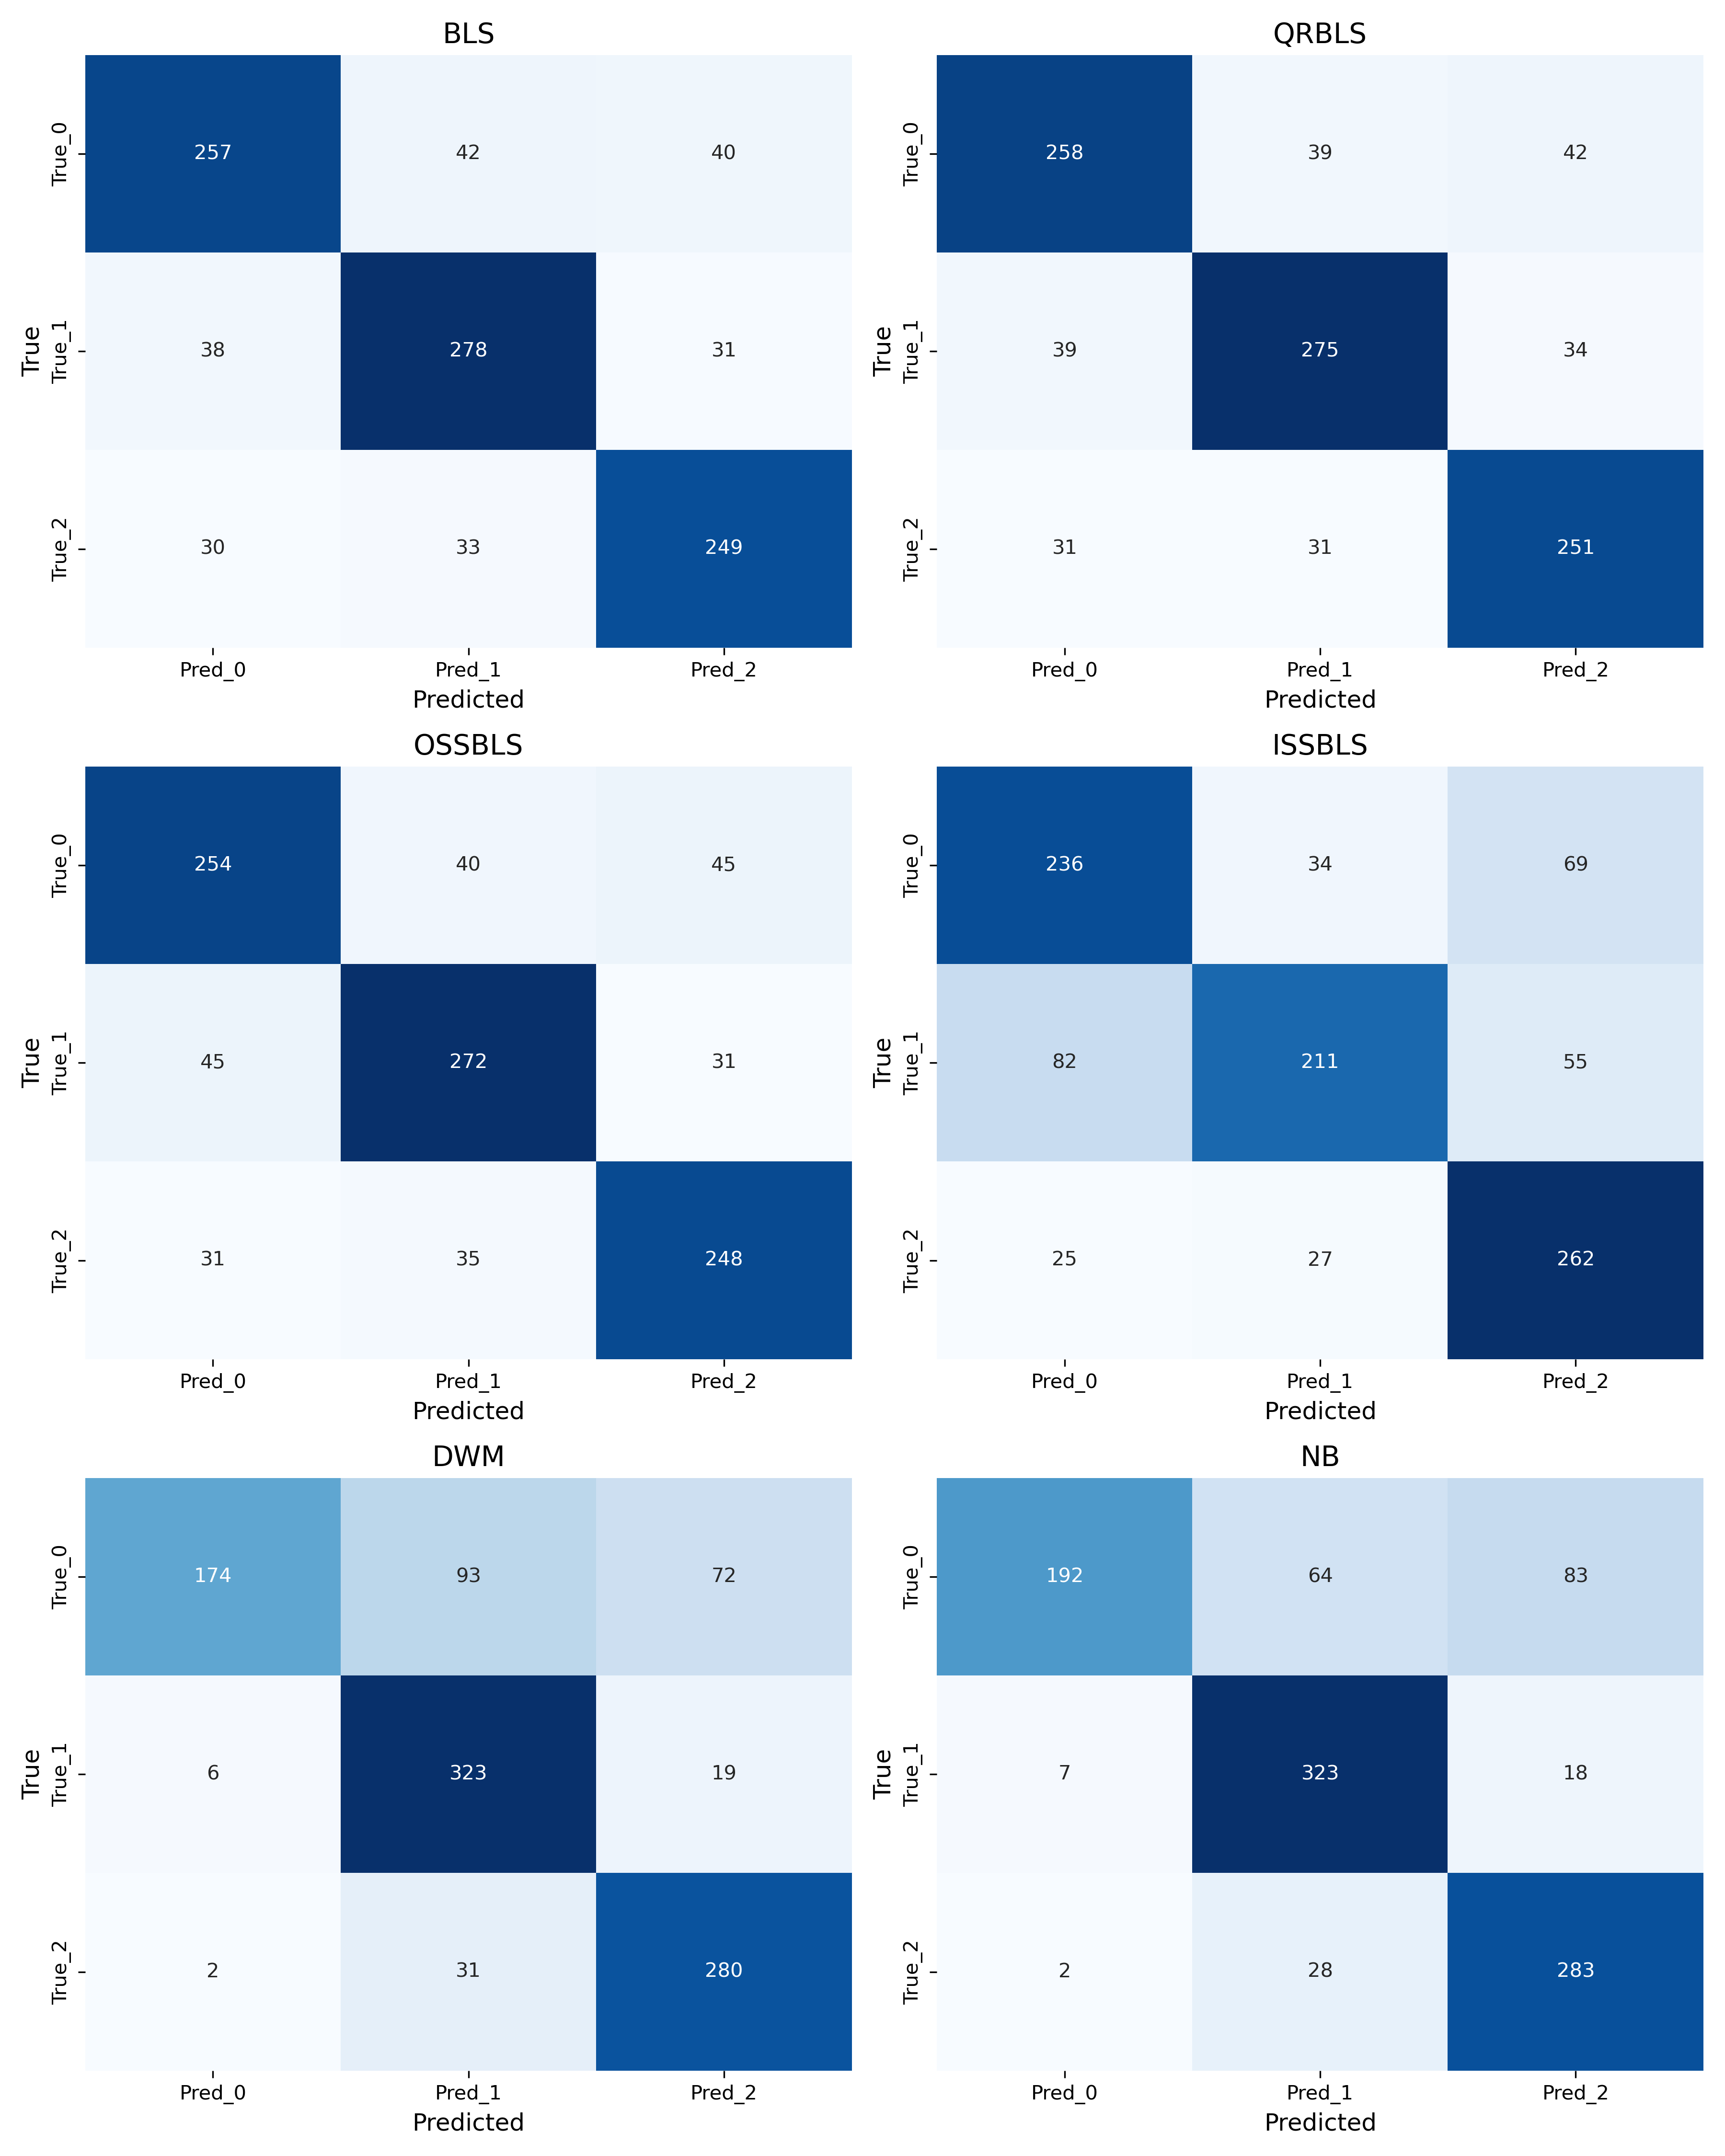


[ALL] Generating combined Accuracy + macro-F1 animation in subplots...


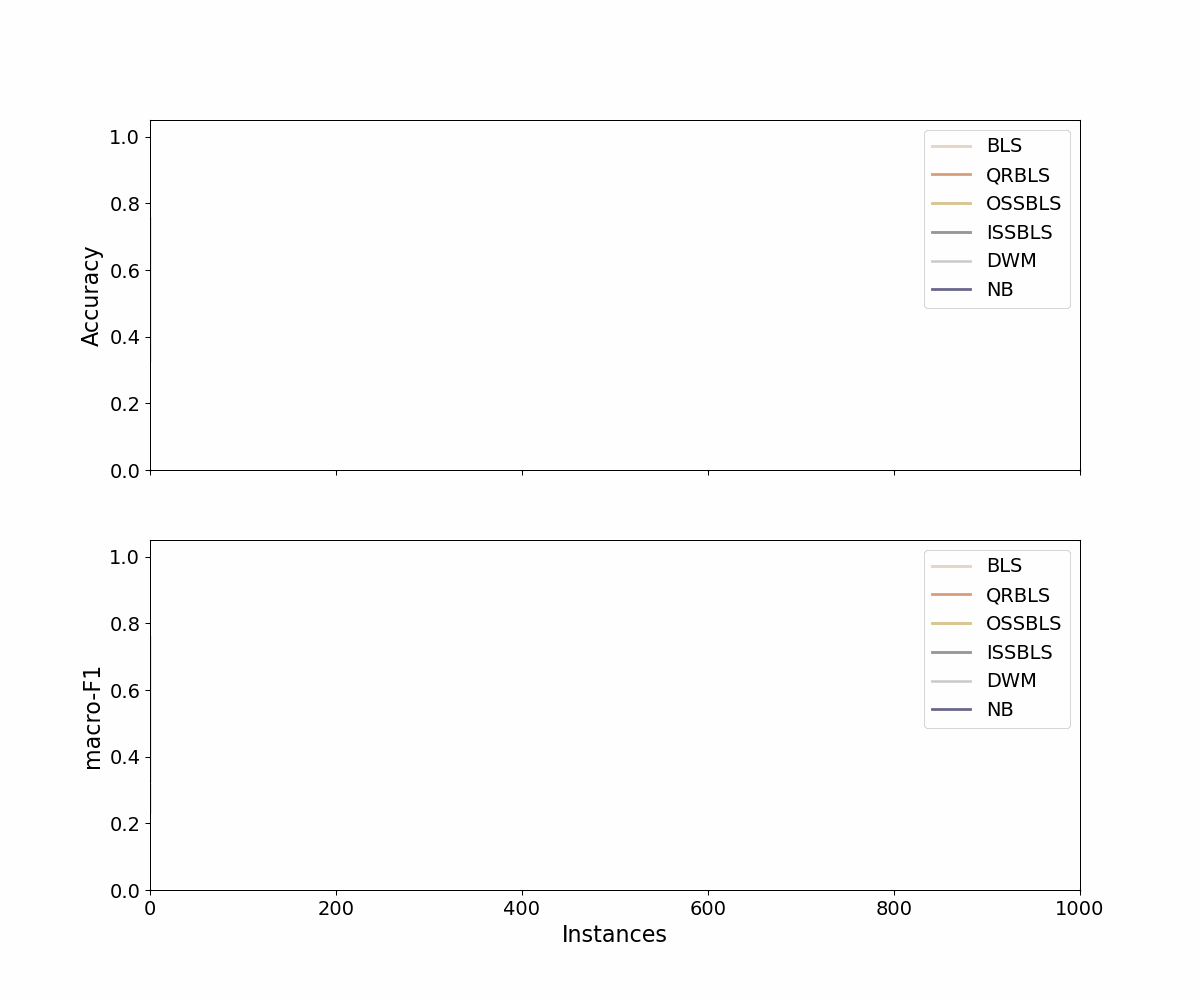

In [5]:
experiment.run()
if show_plot == 'y':
    experiment.show(need_matrix=need_matrix)